### Libraries 

In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import warnings
warnings.filterwarnings('ignore')

## a. Calculate the correlation matrix

*cor_matrix* contains the full correlation matrix. The table below shows a snapshot of the first 5 rows.

In [210]:
#reads the csv
stocks = pd.read_csv('asset_prices.csv')
#craetes a correlation matrix
cor_matrix = stocks.iloc[:,1:].corr()
#shows the first 5 rows
cor_matrix.head()

EOD~BND.11  EOD~DBC.11  EOD~DIA.11  EOD~EEM.11  EOD~EFA.11  \
EOD~BND.11    1.000000   -0.822062    0.794479    0.069905    0.114368   
EOD~DBC.11   -0.822062    1.000000   -0.574282    0.349666    0.200079   
EOD~DIA.11    0.794479   -0.574282    1.000000    0.468724    0.563945   
EOD~EEM.11    0.069905    0.349666    0.468724    1.000000    0.906563   
EOD~EFA.11    0.114368    0.200079    0.563945    0.906563    1.000000   

            EOD~EMB.11  EOD~EPP.11  EOD~EWG.11  EOD~EWI.11  EOD~EWJ.11  \
EOD~BND.11    0.912854    0.119582    0.099310   -0.482615    0.638039   
EOD~DBC.11   -0.600426    0.325952    0.228763    0.600429   -0.472528   
EOD~DIA.11    0.917934    0.519725    0.568437   -0.070294    0.897045   
EOD~EEM.11    0.383581    0.968244    0.871560    0.609441    0.553773   
EOD~EFA.11    0.412868    0.881808    0.961832    0.722791    0.701312   

               ...      EOD~VGK.11  EOD~VPL.11  EOD~VXX.11  EOD~XLB.11  \
EOD~BND.11     ...       -0.037230    0.536324   -0.900317    0.597031   
EOD~DBC.11     ...        0.333239   -0.215966    0.773717   -0.238640   
EOD~DIA.11     ...        0.412195    0.875397   -0.883305    0.898652   
EOD~EEM.11     ...        0.872187    0.788827   -0.162012    0.743330   
EOD~EFA.11     ...        0.975473    0.852729   -0.274274    0.759922   

            EOD~XLE.11  EOD~XLF.11  EOD~XLK.11  EOD~XLU.11  EOD~CSJ.11  \
EOD~BND.11   -0.613705    0.689425    0.845532    0.941027    0.934951   
EOD~DBC.11    0.895370   -0.509694   -0.644009   -0.717165   -0.713552   
EOD~DIA.11   -0.346392    0.975872    0.988677    0.910599    0.917660   
EOD~EEM.11    0.522937    0.488016    0.403966    0.239615    0.227668   
EOD~EFA.11    0.333035    0.596364    0.504831    0.291689    0.308123   

            EOD~FXF.11  
EOD~BND.11   -0.769985  
EOD~DBC.11    0.870505  
EOD~DIA.11   -0.657030  
EOD~EEM.11    0.224999  
EOD~EFA.11    0.135446  

[5 rows x 39 columns]

In [211]:
#extracts the indices from the correlation matrix, which are the stocks
stocks = cor_matrix.index.values

In [212]:
#Changes from dataframe to matrix, so it is easier to create a graph with networkx
cor_matrix = np.asmatrix(cor_matrix)

## b. Create graph

In [215]:
#Crates graph using the data of the correlation matrix
G = nx.from_numpy_matrix(cor_matrix)

#relabels the nodes to match the  stocks names
G = nx.relabel_nodes(G,lambda x: stocks[x])

#Shows the first 5 edges with their corresponding edges
G.edges(data=True)[:5]

[('EOD~IEF.11', 'EOD~IEF.11', {'weight': 1.0}),
 ('EOD~IEF.11', 'EOD~FXB.11', {'weight': -0.8109515006001933}),
 ('EOD~IEF.11', 'EOD~GLD.11', {'weight': -0.0039908434111300085}),
 ('EOD~IEF.11', 'EOD~XLF.11', {'weight': 0.49367913389604445}),
 ('EOD~IEF.11', 'EOD~FXE.11', {'weight': -0.7995281951779287})]

## Part 1: The basic graph

In [174]:
#function to create and display networks from the correlatin matrix. 

def create_corr_network_1(G):
    #crates a list for edges and for the weights
    edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

    #positions
    positions=nx.circular_layout(G)
    
    #Figure size
    plt.figure(figsize=(15,15))

    #draws nodes
    nx.draw_networkx_nodes(G,positions,node_color='#DA70D6',
                           node_size=500,alpha=0.8)
    
    #Styling for labels
    nx.draw_networkx_labels(G, positions, font_size=8, 
                            font_family='sans-serif')
        
    #draws the edges
    nx.draw_networkx_edges(G, positions, edge_list=edges,style='solid')
    
    # displays the graph without axis
    plt.axis('off')
    #saves image
    plt.savefig("part1.png", format="PNG")
    plt.show() 



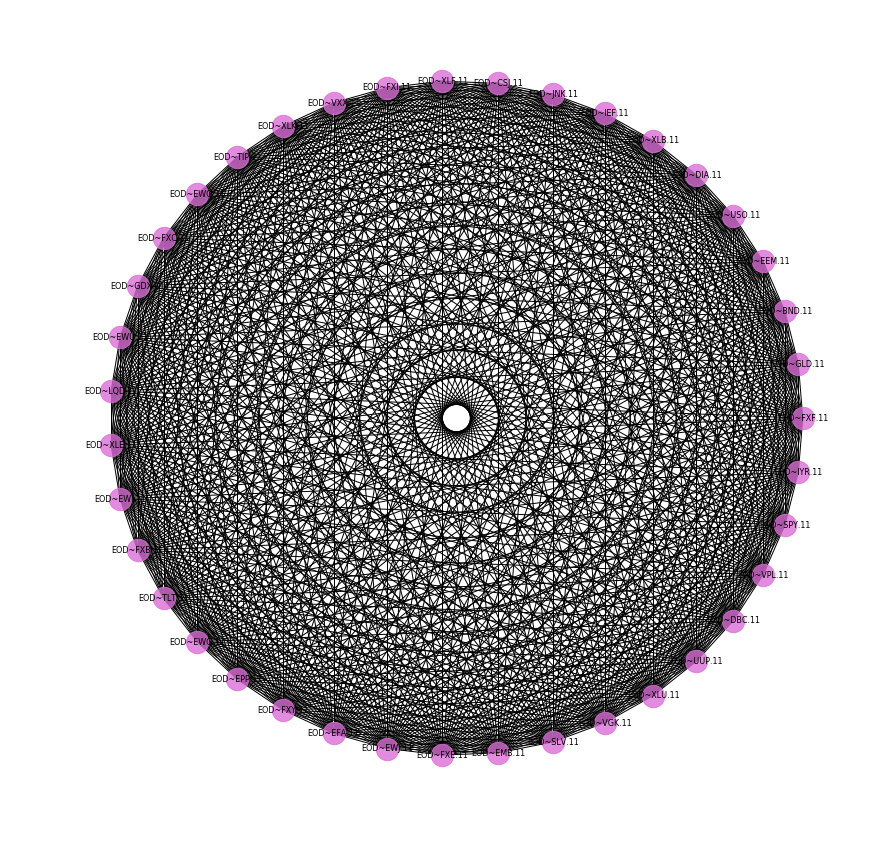

In [193]:
create_corr_network_1(G)

## Part 2: Separating between negative and positive correlations

In [176]:
#function to create and display networks from the correlatin matrix. 

def create_corr_network_2(G, corr_direction):
    ##Creates a copy of the graph
    H = G.copy()
    
    ##Checks all the edges and removes some based on corr_direction
    for stock1, stock2, weight in G.edges_iter(data=True):
        ##if we only want to see the positive correlations we then delete the edges with weight smaller than 0
        if corr_direction == "positive":
            if weight["weight"] <0:
                H.remove_edge(stock1, stock2)
        ##this part runs if the corr_direction is negative and removes edges with weights equal or largen than 0
        else:
            if weight["weight"] >=0:
                H.remove_edge(stock1, stock2)
                
    
    #crates a list for edges and for the weights
    edges,weights = zip(*nx.get_edge_attributes(H,'weight').items())

    #positions
    positions=nx.circular_layout(H)
    
    #Figure size
    plt.figure(figsize=(15,15))

    #draws nodes
    nx.draw_networkx_nodes(H,positions,node_color='#DA70D6',
                           node_size=500,alpha=0.8)
    
    #Styling for labels
    nx.draw_networkx_labels(H, positions, font_size=8, 
                            font_family='sans-serif')
        
    #draws the edges
    nx.draw_networkx_edges(H, positions, edge_list=edges,style='solid')
    
    # displays the graph without axis
    plt.axis('off')
    #saves image
    plt.savefig("part2" + corr_direction + ".png", format="PNG")
    plt.show() 


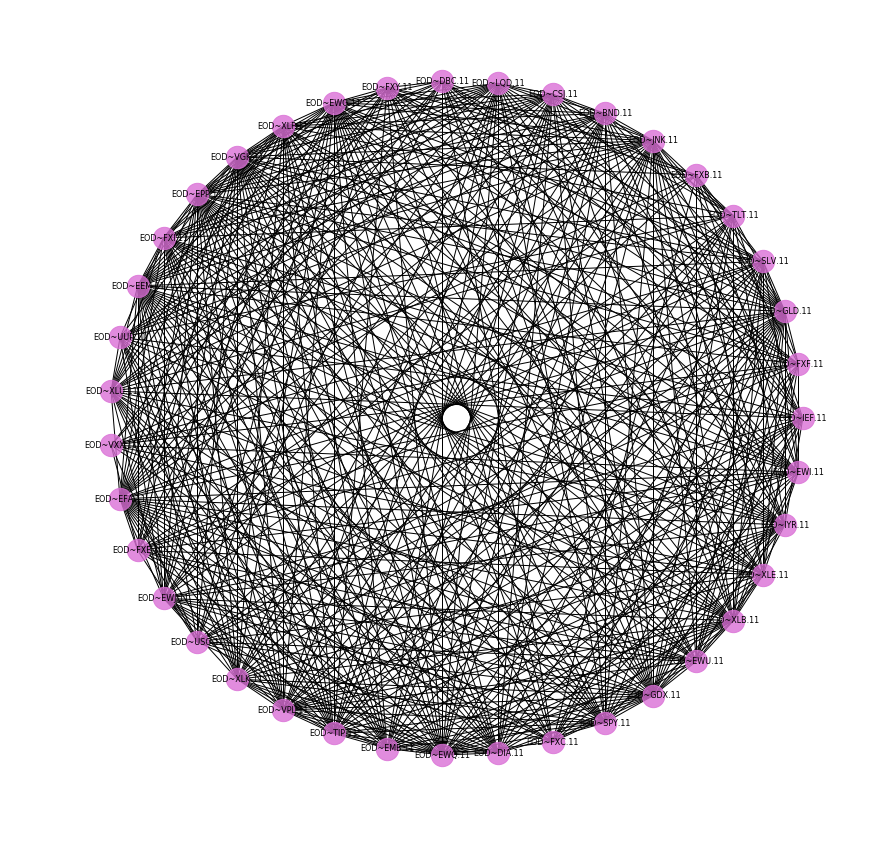

In [194]:
create_corr_network_2(G,corr_direction="positive")

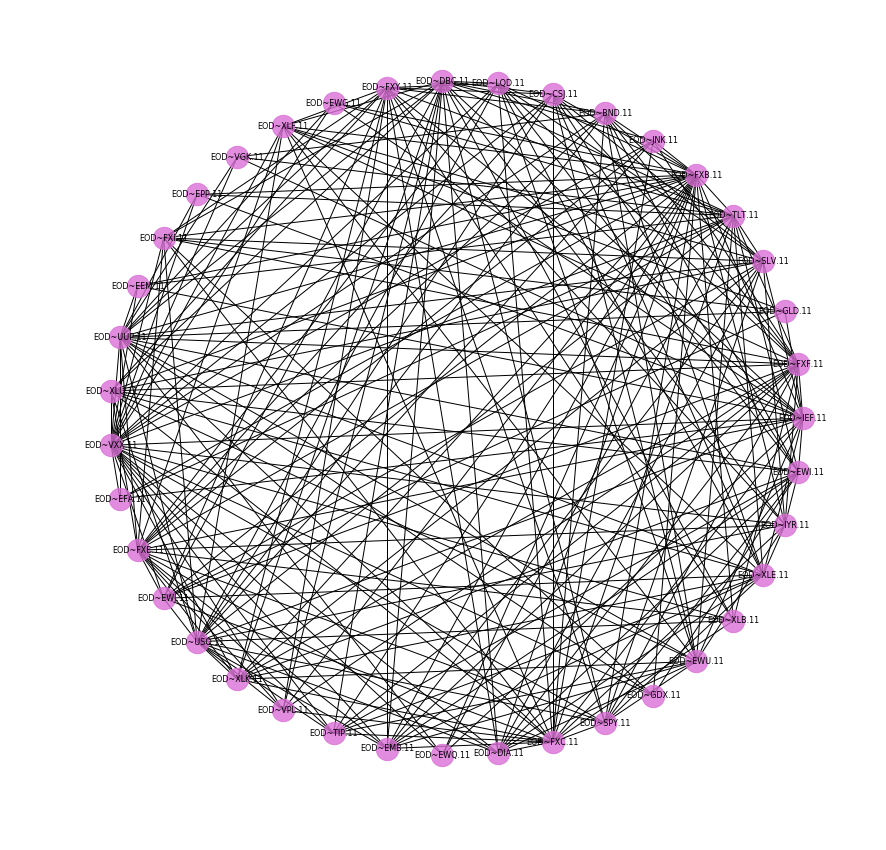

In [216]:
create_corr_network_2(G,corr_direction="negative")

## Part 3: Styling the edges based on their weights

In [180]:
#function to create and display networks from the correlatin matrix. 

def create_corr_network_3(G, corr_direction):
    ##Creates a copy of the graph
    H = G.copy()
    
    ##Checks all the edges and removes some based on corr_direction
    for stock1, stock2, weight in G.edges_iter(data=True):
        ##if we only want to see the positive correlations we then delete the edges with weight smaller than 0
        if corr_direction == "positive":
            if weight["weight"] <0:
                H.remove_edge(stock1, stock2)
        ##this part runs if the corr_direction is negative and removes edges with weights equal or largen than 0
        else:
            if weight["weight"] >=0:
                H.remove_edge(stock1, stock2)
                
    
    #crates a list for edges and for the weights
    edges,weights = zip(*nx.get_edge_attributes(H,'weight').items())
    
    ### increases the value of weights, so that they are more visible in the graph
    weights = tuple([(1+abs(x))**2 for x in weights])

    #positions
    positions=nx.circular_layout(H)
    
    #Figure size
    plt.figure(figsize=(15,15))

    #draws nodes
    nx.draw_networkx_nodes(H,positions,node_color='#DA70D6', 
                           node_size=500,alpha=0.8)
    
    #Styling for labels
    nx.draw_networkx_labels(H, positions, font_size=8, 
                            font_family='sans-serif')
    
    ###edge colors based on weight direction
    if corr_direction == "positive":
        edge_colour = plt.cm.GnBu 
    else:
        edge_colour = plt.cm.PuRd
        
    #draws the edges
    nx.draw_networkx_edges(H, positions, edge_list=edges,style='solid',
                          ###adds width=weights and edge_color = weights 
                          ###so that edges are based on the weight parameter 
                          ###edge_cmap is for the color scale based on the weight
                          ### edge_vmin and edge_vmax assign the min and max weights for the width
                          width=weights, edge_color = weights, edge_cmap = edge_colour,
                          edge_vmin = min(weights), edge_vmax=max(weights))

    # displays the graph without axis
    plt.axis('off')
    #saves image
    plt.savefig("part3" + corr_direction + ".png", format="PNG")
    plt.show() 


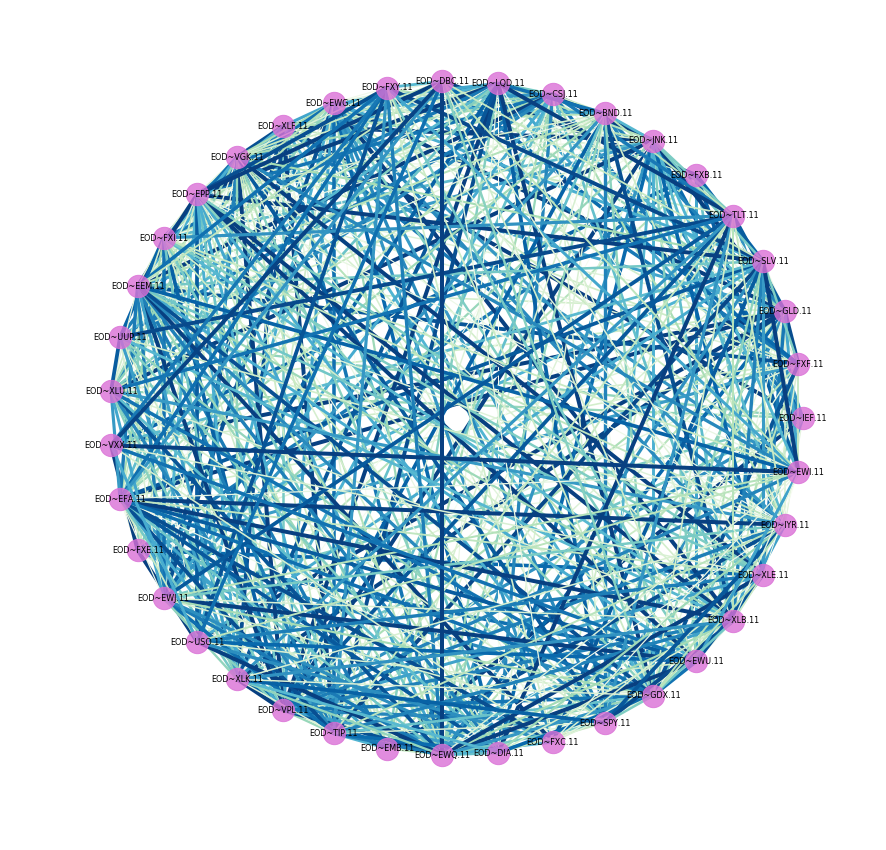

In [195]:
create_corr_network_3(G, corr_direction="positive")

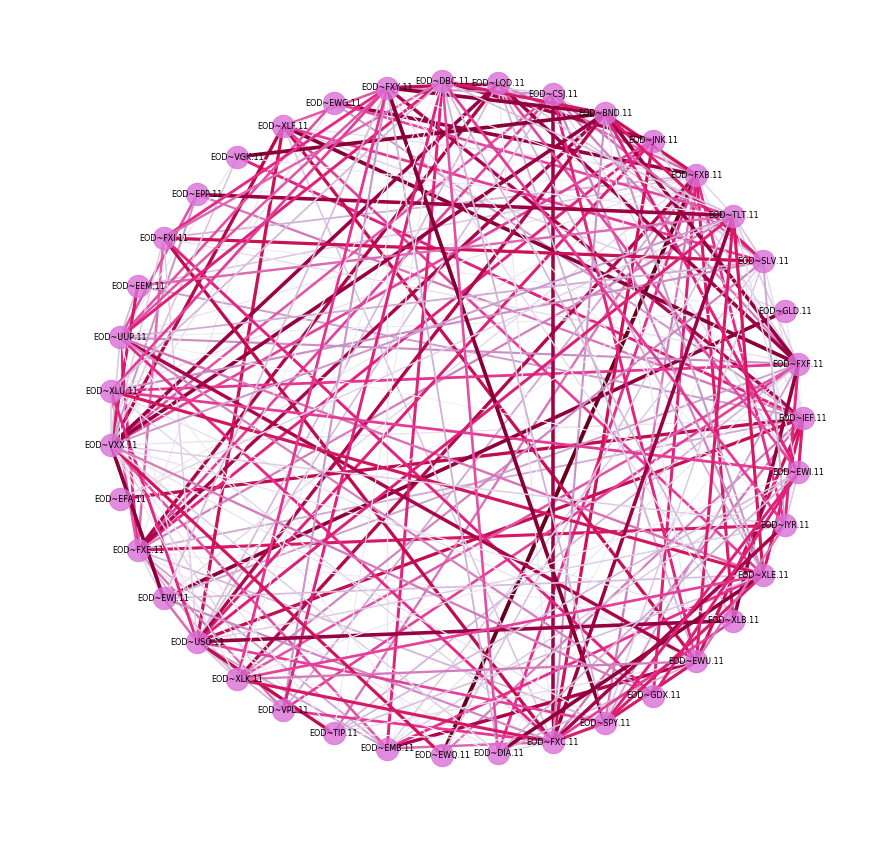

In [196]:
create_corr_network_3(G, corr_direction="negative")

## Part 4: Filtering edges with a minimum correlation

In [182]:
#function to create and display networks from the correlatin matrix. 

def create_corr_network_4(G, corr_direction, min_correlation):
    ##Creates a copy of the graph
    H = G.copy()
    
    ##Checks all the edges and removes some based on corr_direction
    for stock1, stock2, weight in G.edges_iter(data=True):
        ##if we only want to see the positive correlations we then delete the edges with weight smaller than 0        
        if corr_direction == "positive":
            ####it adds a minimum value for correlation. 
            ####If correlation weaker than the min, then it deletes the edge
            if weight["weight"] <0 or weight["weight"] < min_correlation:
                H.remove_edge(stock1, stock2)
        ##this part runs if the corr_direction is negative and removes edges with weights equal or largen than 0
        else:
            ####it adds a minimum value for correlation. 
            ####If correlation weaker than the min, then it deletes the edge
            if weight["weight"] >=0 or weight["weight"] > min_correlation:
                H.remove_edge(stock1, stock2)
                
    
    #crates a list for edges and for the weights
    edges,weights = zip(*nx.get_edge_attributes(H,'weight').items())
    
    ### increases the value of weights, so that they are more visible in the graph
    weights = tuple([(1+abs(x))**2 for x in weights])

    #positions
    positions=nx.circular_layout(H)
    
    #Figure size
    plt.figure(figsize=(15,15))

    #draws nodes
    nx.draw_networkx_nodes(H,positions,node_color='#DA70D6',
                           node_size=500,alpha=0.8)
    
    #Styling for labels
    nx.draw_networkx_labels(H, positions, font_size=8, 
                            font_family='sans-serif')
    
    ###edge colors based on weight direction
    if corr_direction == "positive":
        edge_colour = plt.cm.GnBu 
    else:
        edge_colour = plt.cm.PuRd
        
    #draws the edges
    nx.draw_networkx_edges(H, positions, edge_list=edges,style='solid',
                          ###adds width=weights and edge_color = weights 
                          ###so that edges are based on the weight parameter 
                          ##edge_cmap is for the color scale based on the weight
                          ### edge_vmin and edge_vmax assign the min and max weights for the width
                          width=weights, edge_color = weights, edge_cmap = edge_colour,
                          edge_vmin = min(weights), edge_vmax=max(weights))

    # displays the graph without axis
    plt.axis('off')
    #saves image
    plt.savefig("part4" + corr_direction + ".png", format="PNG")
    plt.show() 


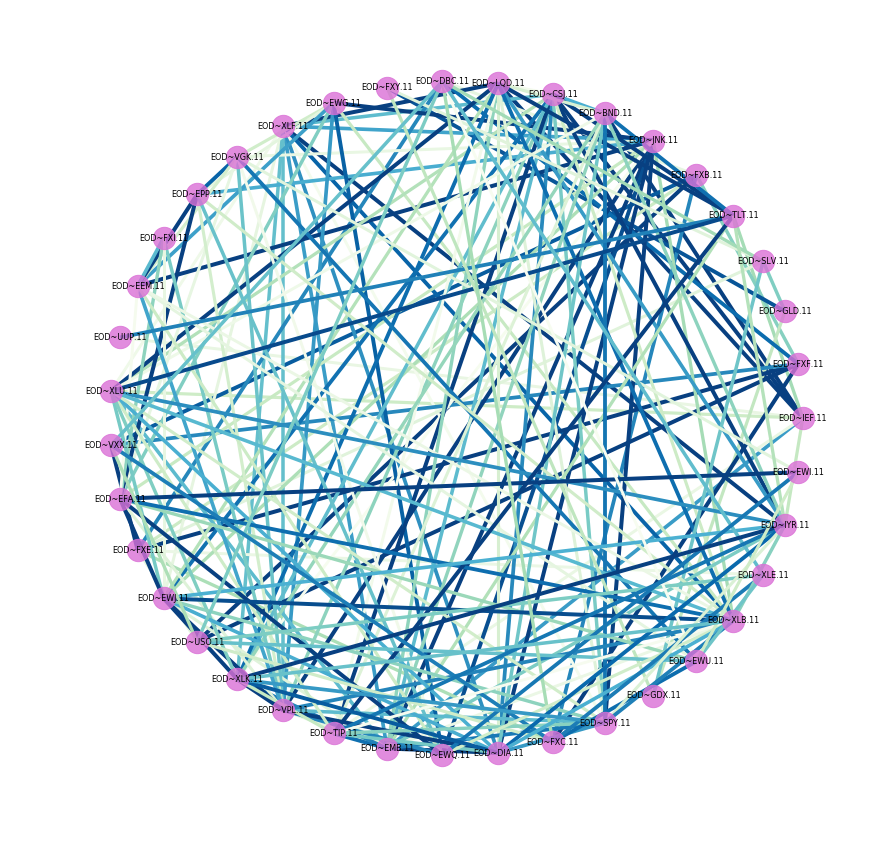

In [197]:
create_corr_network_4(G, corr_direction="positive", min_correlation = 0.7)

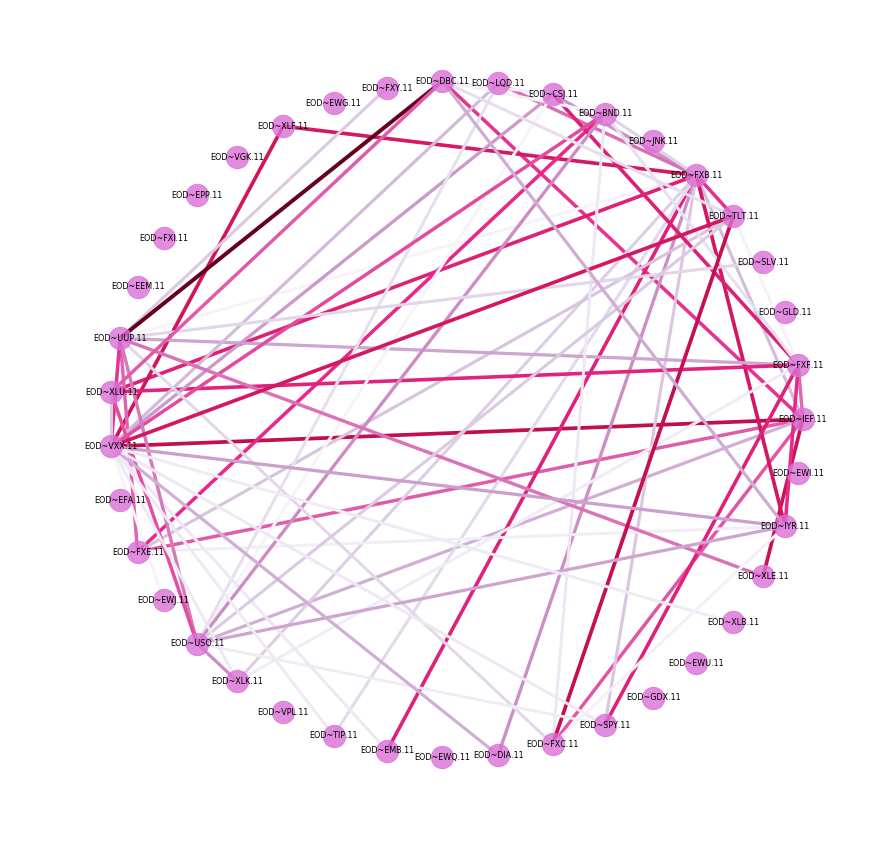

In [198]:
create_corr_network_4(G, corr_direction="negative", min_correlation = -0.7)

## Part 5: Styling the nodes based on the number of edges linked (degree)

In [185]:
#function to create and display networks from the correlatin matrix. 

def create_corr_network_5(G, corr_direction, min_correlation):
    ##Creates a copy of the graph
    H = G.copy()
    
    ##Checks all the edges and removes some based on corr_direction
    for stock1, stock2, weight in G.edges_iter(data=True):
        ##if we only want to see the positive correlations we then delete the edges with weight smaller than 0        
        if corr_direction == "positive":
            ####it adds a minimum value for correlation. 
            ####If correlation weaker than the min, then it deletes the edge
            if weight["weight"] <0 or weight["weight"] < min_correlation:
                H.remove_edge(stock1, stock2)
        ##this part runs if the corr_direction is negative and removes edges with weights equal or largen than 0
        else:
            ####it adds a minimum value for correlation. 
            ####If correlation weaker than the min, then it deletes the edge
            if weight["weight"] >=0 or weight["weight"] > min_correlation:
                H.remove_edge(stock1, stock2)
                
    
    #crates a list for edges and for the weights
    edges,weights = zip(*nx.get_edge_attributes(H,'weight').items())
    
    ### increases the value of weights, so that they are more visible in the graph
    weights = tuple([(1+abs(x))**2 for x in weights])
    
    #####calculates the degree of each node
    d = nx.degree(H)
    #####creates list of nodes and a list their degrees that will be used later for their sizes
    nodelist, node_sizes = zip(*d.items())

    #positions
    positions=nx.circular_layout(H)
    
    #Figure size
    plt.figure(figsize=(15,15))

    #draws nodes
    nx.draw_networkx_nodes(H,positions,node_color='#DA70D6',nodelist=nodelist,
                           #####the node size will be now based on its degree
                           node_size=tuple([x**3 for x in node_sizes]),alpha=0.8)
    
    #Styling for labels
    nx.draw_networkx_labels(H, positions, font_size=8, 
                            font_family='sans-serif')
    
    ###edge colors based on weight direction
    if corr_direction == "positive":
        edge_colour = plt.cm.GnBu 
    else:
        edge_colour = plt.cm.PuRd
        
    #draws the edges
    nx.draw_networkx_edges(H, positions, edge_list=edges,style='solid',
                          ###adds width=weights and edge_color = weights 
                          ###so that edges are based on the weight parameter 
                          ###edge_cmap is for the color scale based on the weight
                          ### edge_vmin and edge_vmax assign the min and max weights for the width
                          width=weights, edge_color = weights, edge_cmap = edge_colour,
                          edge_vmin = min(weights), edge_vmax=max(weights))

    # displays the graph without axis
    plt.axis('off')
    #saves image
    plt.savefig("part5" + corr_direction + ".png", format="PNG")
    plt.show() 


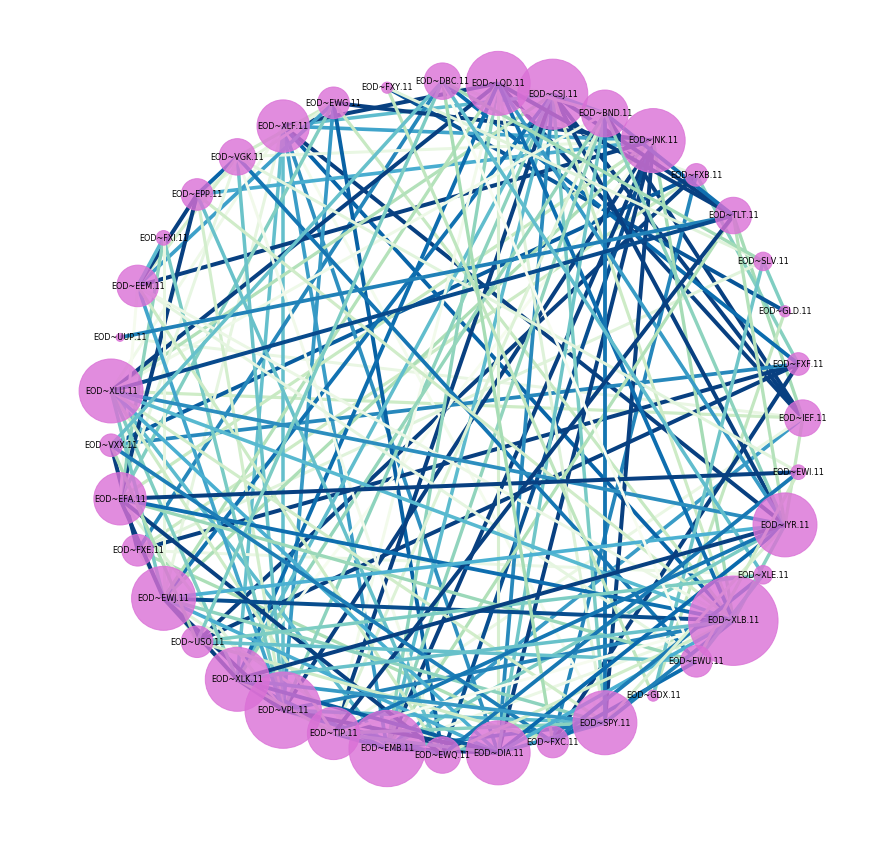

In [199]:
create_corr_network_5(G, corr_direction="positive",min_correlation=0.7)

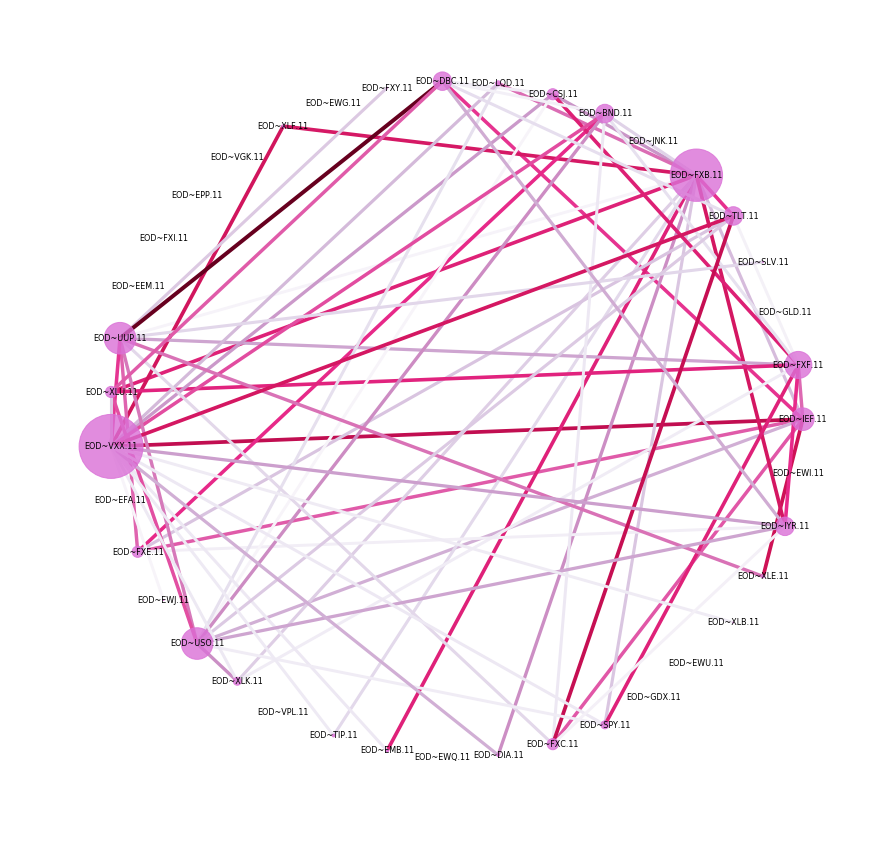

In [200]:
create_corr_network_5(G, corr_direction="negative",min_correlation=-0.7)